In [1]:
from Genética_1000_unos import *
import numpy as np

INDIVIDUOS = 100
GENES = 100
MUTACION = 0.1

1. Escribir un AG sin crossover ni mutaci´on. Se pide analizar como var´ıa la media entre generaciones y deducir a que se debe esta evoluci´on.

64


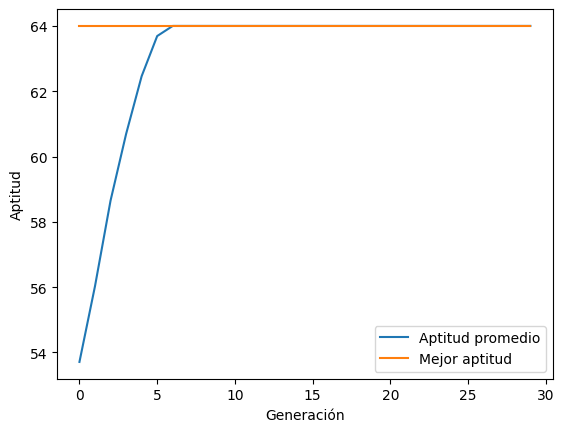

In [2]:
#Crear una poblacion
poblacion = np.random.choice([0,1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 30

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        # No hacemos crossover. El hijo será el mejor de los padres.
        nuevo_individuo = max(padres, key=aptitud)
        nueva_generacion.append(nuevo_individuo)
    nueva_generacion = np.array(nueva_generacion)
    # No mutamos nunca.

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt
plt.plot(aptitud_promedio, label='Aptitud promedio')
plt.plot(mejores_aptitudes, label='Mejor aptitud')
plt.xlabel('Generación')
plt.ylabel('Aptitud')
plt.legend()
plt.show()

Se puede ver como rápidamente converge en un valor no demasiado bueno, dado que no hay variación de la población, sino que esta llega a ser una multitud de clones del mejor individuo inicial (que era aleatorio)

2. Introducir un operador mutaci´on con probabilidad pm = 1. Se pide analizar como var´ıa la media entre generaciones y deducir a que se debe esta evoluci´on.

88


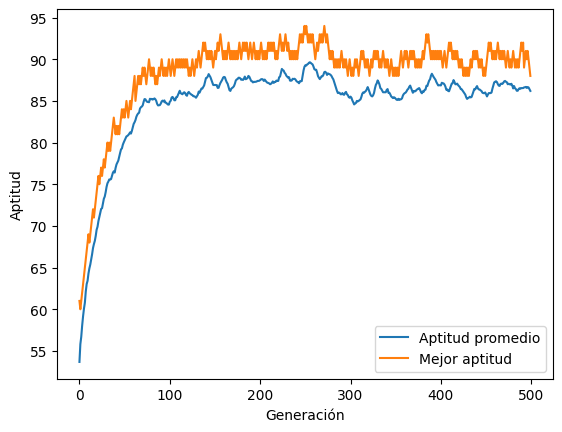

In [3]:
#Crear una poblacion
poblacion = np.random.choice([0,1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 500

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        # No hacemos crossover. El hijo será el mejor de los padres.
        nuevo_individuo = max(padres, key=aptitud)
        nueva_generacion.append(nuevo_individuo)
    nueva_generacion = np.array(nueva_generacion)
    # Mutamos siempre
    mutar(nueva_generacion, 1)

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt
plt.plot(aptitud_promedio, label='Aptitud promedio')
plt.plot(mejores_aptitudes, label='Mejor aptitud')
plt.xlabel('Generación')
plt.ylabel('Aptitud')
plt.legend()
plt.show()

Tras 500 ejecuciones vemos que pasa algo similar al paratado 1, pero que gracias a la mutación, el estancamiento se convierte en oscilación y los valores medios acaban siendo cercanos a 90.

3. Introducir un operador crossover con probabilidad pc = 1 y apagar el operador mutaci´on (pm =0). Se pide analizar como var´ıa la media entre generaciones y deducir a que se debe esta evoluci´on.

Generación 100 Mejor aptitud 73, aptitud promedio 68.08
Generación 200 Mejor aptitud 75, aptitud promedio 72.18
Generación 300 Mejor aptitud 74, aptitud promedio 72.49
Generación 400 Mejor aptitud 73, aptitud promedio 73.0
Generación 500 Mejor aptitud 73, aptitud promedio 73.0
Generación 600 Mejor aptitud 73, aptitud promedio 73.0
Generación 700 Mejor aptitud 73, aptitud promedio 73.0
Generación 800 Mejor aptitud 73, aptitud promedio 73.0
Generación 900 Mejor aptitud 73, aptitud promedio 73.0
Generación 1000 Mejor aptitud 73, aptitud promedio 73.0
Generación 1100 Mejor aptitud 73, aptitud promedio 73.0
Generación 1200 Mejor aptitud 73, aptitud promedio 73.0
Generación 1300 Mejor aptitud 73, aptitud promedio 73.0
Generación 1400 Mejor aptitud 73, aptitud promedio 73.0
Generación 1500 Mejor aptitud 73, aptitud promedio 73.0
Generación 1600 Mejor aptitud 73, aptitud promedio 73.0
Generación 1700 Mejor aptitud 73, aptitud promedio 73.0
Generación 1800 Mejor aptitud 73, aptitud promedio 73.

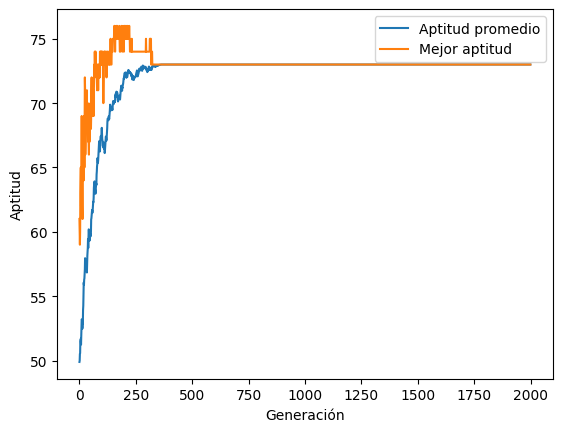

In [4]:
# Crear una poblacion
poblacion = np.random.choice([0, 1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 2000

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # No mutamos

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()



Se puede ver como la mejor aptitud de todas se estanca debido a que llega a un punto en el que es necesaria la mutación para evitar un máximo local.
También se ve como la media alcanza la mejor aptitud. Nótese que esta mejor aptitud puede ser descendida a lo largo de las generaciones debido a la ruleta con pesos.

4. Considerar un caso con mutaci´on y crossover activos.

Generación 100 Mejor aptitud 78, aptitud promedio 71.71
Generación 200 Mejor aptitud 83, aptitud promedio 77.92
Generación 300 Mejor aptitud 85, aptitud promedio 80.67
Generación 400 Mejor aptitud 85, aptitud promedio 80.02
Generación 500 Mejor aptitud 88, aptitud promedio 80.03
Generación 600 Mejor aptitud 85, aptitud promedio 81.98
Generación 700 Mejor aptitud 90, aptitud promedio 85.45
Generación 800 Mejor aptitud 90, aptitud promedio 86.07
Generación 900 Mejor aptitud 92, aptitud promedio 87.02
Generación 1000 Mejor aptitud 91, aptitud promedio 86.1
Generación 1100 Mejor aptitud 91, aptitud promedio 85.0
Generación 1200 Mejor aptitud 86, aptitud promedio 81.21
Generación 1300 Mejor aptitud 87, aptitud promedio 83.9
Generación 1400 Mejor aptitud 89, aptitud promedio 82.69
Generación 1500 Mejor aptitud 83, aptitud promedio 78.2
Generación 1600 Mejor aptitud 86, aptitud promedio 81.43
Generación 1700 Mejor aptitud 86, aptitud promedio 80.61
Generación 1800 Mejor aptitud 88, aptitud pr

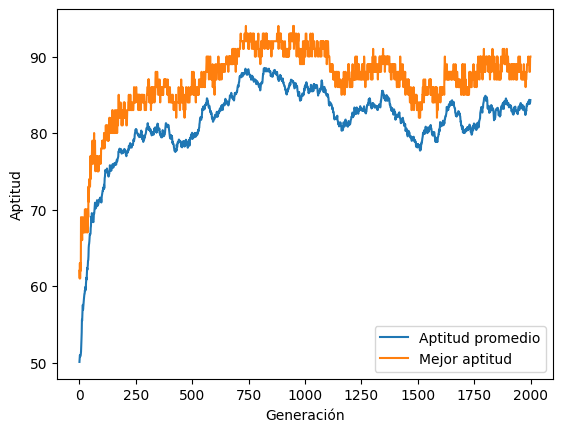

In [5]:
# Crear una poblacion
poblacion = np.random.choice([0, 1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 2000

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # Mutamos aleatoriamente
    mutar(nueva_generacion, 0.1)

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

Vemos como se produce un rápido ascenso el la aptitud media, mientras que el 10% de probabilidad de mutación hace que, pese a que parezca converger, haya oscilaciones que siguen aumentando muy ligeramente como tendencia general.

5. Introducir un operador de elitismo en la ruleta implementada para la selecci´on.

100


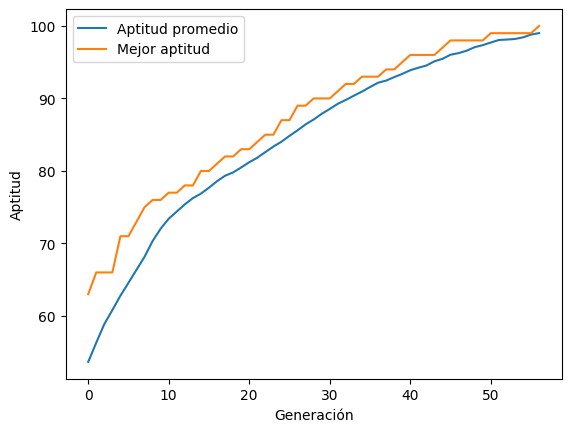

In [6]:
# Crear una poblacion
poblacion = np.random.choice([0, 1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 2000

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # Mutamos aleatoriamente
    mutar(nueva_generacion, 0.1)
    
    # Aplicamos el elitismo
    nueva_generacion = seleccion_elitista(np.vstack([poblacion, nueva_generacion]), INDIVIDUOS)

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

Con el elitirmos observamos que rápidamente el algoritmo converge, produciendo un individuo óptimo, cuya aptitud es 100, produciendo la salida del bucle principal.